<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/NLP_Duplicate_Ques_Pair_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/questions.csv')

In [5]:
new_df=df.sample(50000,random_state=2)

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [7]:
def preprocess(q):
  q=str(q).lower().strip()

  #Replace certain special characters with their string equivalents
  q=q.replace('%','percent')
  q=q.replace('$','dollar')
  q=q.replace('₹','rupee')
  q=q.replace('€','euro')
  q=q.replace('@','at')

  # The pattern [math] appears around 900 times in the whole dataset
  q=q.replace('[math]','')

  # Replace the same numbers with string equivalents (not perfect, can be better)
  q=q.replace('000,000,000 ','b ')
  q=q.replace('000,000 ','m ')
  q=q.replace('000 ','k ')
  q=re.sub(r'([0-9]+)000000000',r'\1b',q)
  q=re.sub(r'([0-9]+)000000',r'\1m',q)
  q=re.sub(r'([0-9]+)000',r'\1k',q)

  #Decontracting words
  contractions={
      "ain't":"is not",
      "aren't":"are not",
      "can't":"cannot",
      "can't've":"cannot have",
      "cause":"because",
      "could've":"could have",
      "couldn't":"could not",
      "couldn't've":"could not have",
      "didn't":"did not",
      "doesn't":"does not",
      "don't":"do not",
      "hadn't":"had not",
      "hadn't've":"had not have",
      "hasn't":"has not",
      "haven't":"have not",
      "he'd":"he would",
      "he'd've":"he would have",
      "he'll":"he will",
      "he'll've":"he will have",
      "he's":"he is",
      "how'd":"how did",
      "how'd'y":"how do you",
      "how'll":"how will",
      "how's":"how is",
      "i'd":"i would",
      "i'd've":"i would have",
      "i'll":"i will",
      "i'll've":"i will have",
      "i'm":"i am",
      "i've":"i have",
      "isn't":"is not",
      "it'd":"it would",
      "it'd've":"it would have",
      "it'll":"it will",
      "it'll've":"it will have",
      "it's":"it is",
      "let's":"let us",
      "ma'am":"madam",
      "mayn't":"may not",
      "might've":"might have",
      "mightn't":"might not",
      "mightn't've":"might not have",
      "must've":"must have",
      "mustn't":"must not",
      "mustn't've":"must not have",
      "needn't":"need not",
      "needn't've":"need not have",
      "o'clock":"of the clock",
      "oughtn't":"ought not",
      "oughtn't've":"ought not have",
      "shan't":"shall not",
      "sha'n't":"shall not",
      "shan't've":"shall not have",
      "she'd":"she would",
      "she'd've":"she would have",
      "she'll":"she will",
      "she'll've":"she will have",
      "she's":"she is",
      "you'd":"you would",
      "you'd've":"you would have",
      "you'll":"you will",
      "you'll've":"you will have",
      "you're":"you are",
      "you've":"you have",
      "wasn't":"was not",
      "we'd":"we would",
      "we'd've":"we would have",
      "we'll":"we will",
      "we'll've":"we will have",
      "we're":"we are",
      "we've":"we have",
      "weren't":"were not",
      "what'll":"what will",
      "what'll've":"what will have",
      "what're":"what are",
      "what's":"what is",
      "what've":"what have",
      "when's":"when is",
      "when've":"when have",
      "where'd":"where did",
      "where's":"where is",
      "where've":"where have",
      "who'll":"who will",
      "who'll've":"who will have",
      "who's":"who is",
      "who've":"who have",
      "why's":"why is",
      "why've":"why have",
      "will've":"will have",
      "won't":"will not",
      "won't've":"will not have",
      "would've":"would have",
      "wouldn't":"would not",
      "wouldn't've":"would not have",
      "y'all":"you all",
      "y'all'd":"you all would",
      "y'all'd've":"you all would have",
      "y'all're":"you all are",
      "y'all've":"you all have",
      "you'd":"you would",
      "you'd've":"you would have",
      "you'll":"you will",
      "you'll've":"you will have",
      "you're":"you are",
      "you've":"you have"
  }

  q_decontracted=[]

  for word in q.split():
    if word in contractions:
      word=contractions[word]

    q_decontracted.append(word)

  q=' '.join(q_decontracted)
  q=q.replace("'ve","have")
  q=q.replace("n't","not")
  q=q.replace("'re","are")
  q=q.replace("'ll","will")

  # removing HTML tags
  q=BeautifulSoup(q)
  q=q.get_text()

  # removing the punctuations
  pattern=re.compile('\W')

  q=re.sub(pattern,' ',q).strip()

  return q

In [8]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [9]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0


In [11]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [12]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9


In [13]:
def common_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return len(w1&w2)

In [14]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6


In [15]:
def total_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+len(w2))

In [16]:
new_df['word_total']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6,19
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3,33
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18,38
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6,20


In [17]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6,19,0.32
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3,33,0.09
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18,38,0.47
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18,0.33
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6,20,0.30


Advanced Feature Engineering

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def fetch_token_features(row):
  q1=row['question1']
  q2=row['question2']

  SAFE_DIV=0.0001
  STOP_WORDS=stopwords.words("english")
  token_features=[0.0]*8

  #converting the sentence to tokens
  q1_tokens=q1.split()
  q2_tokens=q2.split()

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return token_features

  q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])
  q1_stops=set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stops=set([word for word in q2_tokens if word in STOP_WORDS])

  common_word_count=len(q1_words.intersection(q2_words))
  common_stop_count=len(q1_stops.intersection(q2_stops))
  common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
  token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
  token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
  token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops))+SAFE_DIV)
  token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
  token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens))+SAFE_DIV)


  token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

  token_features[7]=int(q1_tokens[0]==q2_tokens[0])

  return token_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
token_features=new_df.apply(fetch_token_features,axis=1)

In [20]:
new_df['cwc_min']=list(map(lambda x:x[0],token_features))
new_df['cwc_max']=list(map(lambda x:x[1],token_features))
new_df['csc_min']=list(map(lambda x:x[2],token_features))
new_df['csc_max']=list(map(lambda x:x[3],token_features))
new_df['ctc_min']=list(map(lambda x:x[4],token_features))
new_df['ctc_max']=list(map(lambda x:x[5],token_features))
new_df['last_word_eq']=list(map(lambda x:x[6],token_features))
new_df['first_word_eq']=list(map(lambda x:x[7],token_features))

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,19,0.32,0.799984,0.666656,0.666644,0.399992,0.749991,0.545450,0.0,1.0
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,...,33,0.09,0.000000,0.000000,0.499992,0.272725,0.272725,0.136363,0.0,0.0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,...,38,0.47,0.923070,0.923070,0.999980,0.999980,0.708330,0.708330,1.0,1.0
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,18,0.33,0.749981,0.599988,0.749981,0.599988,0.749991,0.599994,0.0,1.0
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,...,20,0.30,0.749981,0.599988,0.599988,0.499992,0.666659,0.545450,0.0,1.0


In [22]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=71f6ea379cf8da9f1a85e64fc7270d15aceeeac2f88025ea98dcb44ce9bd4436
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [23]:
# Length based features
import distance
def fetch_length_features(row):
  q1=row['question1']
  q2=row['question2']

  length_features=[0.0]*3

  q1_tokens=q1.split()
  q2_tokens=q2.split()

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return length_features

  length_features[0]=abs(len(q1_tokens)-len(q2_tokens))

  length_features[1]=(len(q1_tokens)+len(q2_tokens))/2

  strs=list(distance.lcsubstrings(q1,q2))
  length_features[2]=len(strs[0])/min(len(q1),len(q2))

  return length_features

In [24]:
length_features=new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff']=list(map(lambda x:x[0],length_features))
new_df['mean_len']=list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio']=list(map(lambda x:x[2],length_features))

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,0.666656,0.666644,0.399992,0.749991,0.545450,0.0,1.0,3.0,9.5,0.317073
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,...,0.000000,0.499992,0.272725,0.272725,0.136363,0.0,0.0,11.0,16.5,0.117647
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,...,0.923070,0.999980,0.999980,0.708330,0.708330,1.0,1.0,0.0,24.0,0.598361
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599988,0.749981,0.599988,0.749991,0.599994,0.0,1.0,2.0,9.0,0.363636
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,...,0.599988,0.599988,0.499992,0.666659,0.545450,0.0,1.0,2.0,10.0,0.410256


In [26]:
!pip install fuzzywuzzy

In [27]:
from fuzzywuzzy import fuzz
def fetch_fuzzy_features(row):
  q1=row['question1']
  q2=row['question2']

  fuzzy_features=[0.0]*4

  fuzzy_features[0]=fuzz.QRatio(q1,q2)

  fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

  fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

  fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

  return fuzzy_features


In [28]:
fuzzy_features=new_df.apply(fetch_fuzzy_features,axis=1)

new_df['fuzz_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio']=list(map(lambda x:x[1],fuzzy_features))
new_df['token_sort_ratio']=list(map(lambda x:x[2],fuzzy_features))
new_df['token_set_ratio']=list(map(lambda x:x[3],fuzzy_features))

In [29]:
print(new_df.shape)
new_df.head()

(50000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,0.545450,0.0,1.0,3.0,9.5,0.317073,39,46,67,85
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,...,0.136363,0.0,0.0,11.0,16.5,0.117647,26,50,35,37
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,...,0.708330,1.0,1.0,0.0,24.0,0.598361,100,99,100,99
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599994,0.0,1.0,2.0,9.0,0.363636,74,75,74,89
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,...,0.545450,0.0,1.0,2.0,10.0,0.410256,76,85,78,84


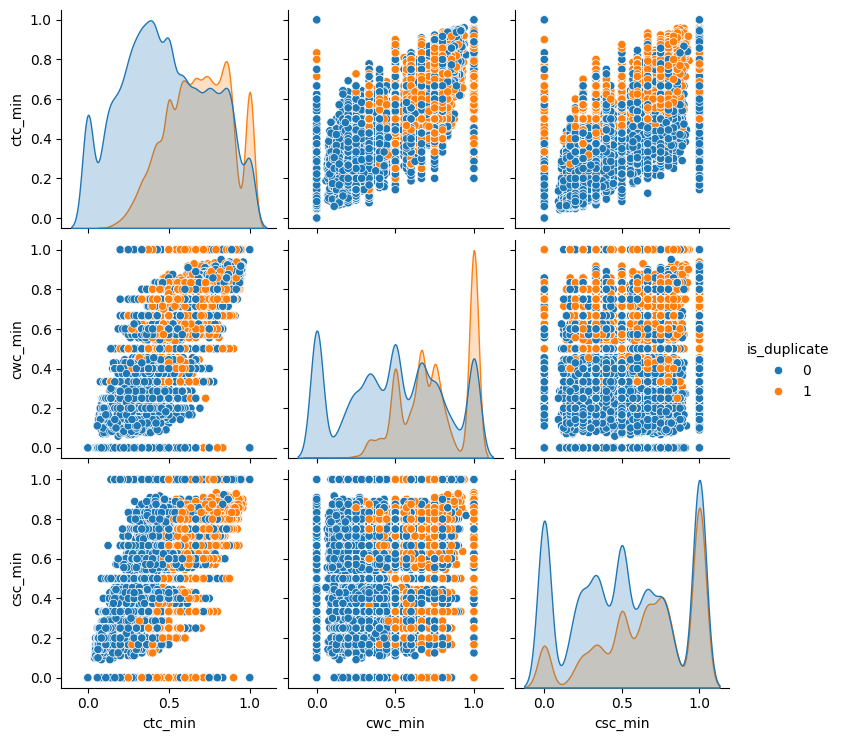

In [30]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

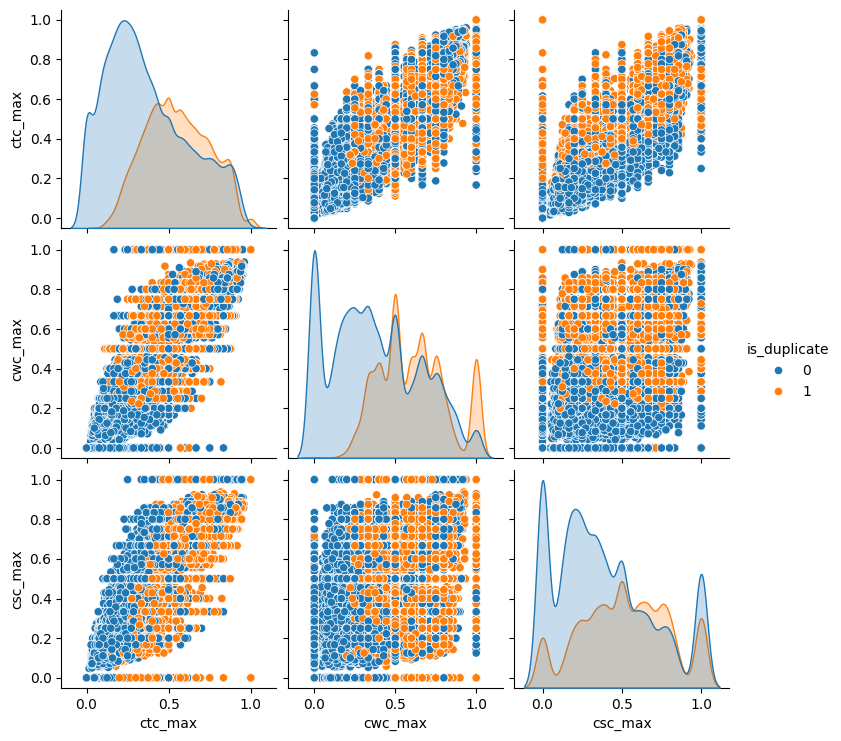

In [31]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

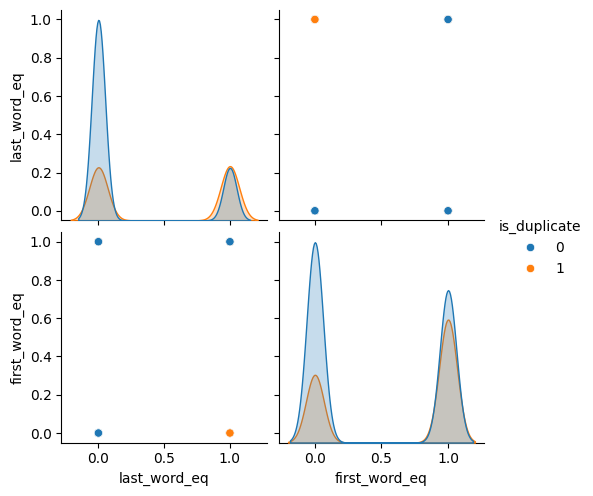

In [32]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

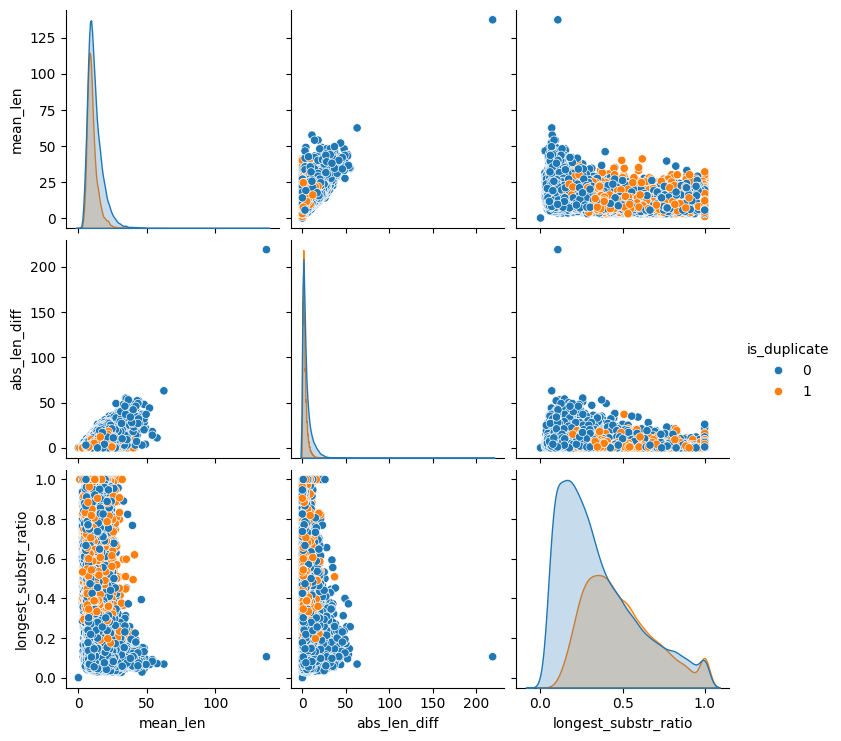

In [33]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

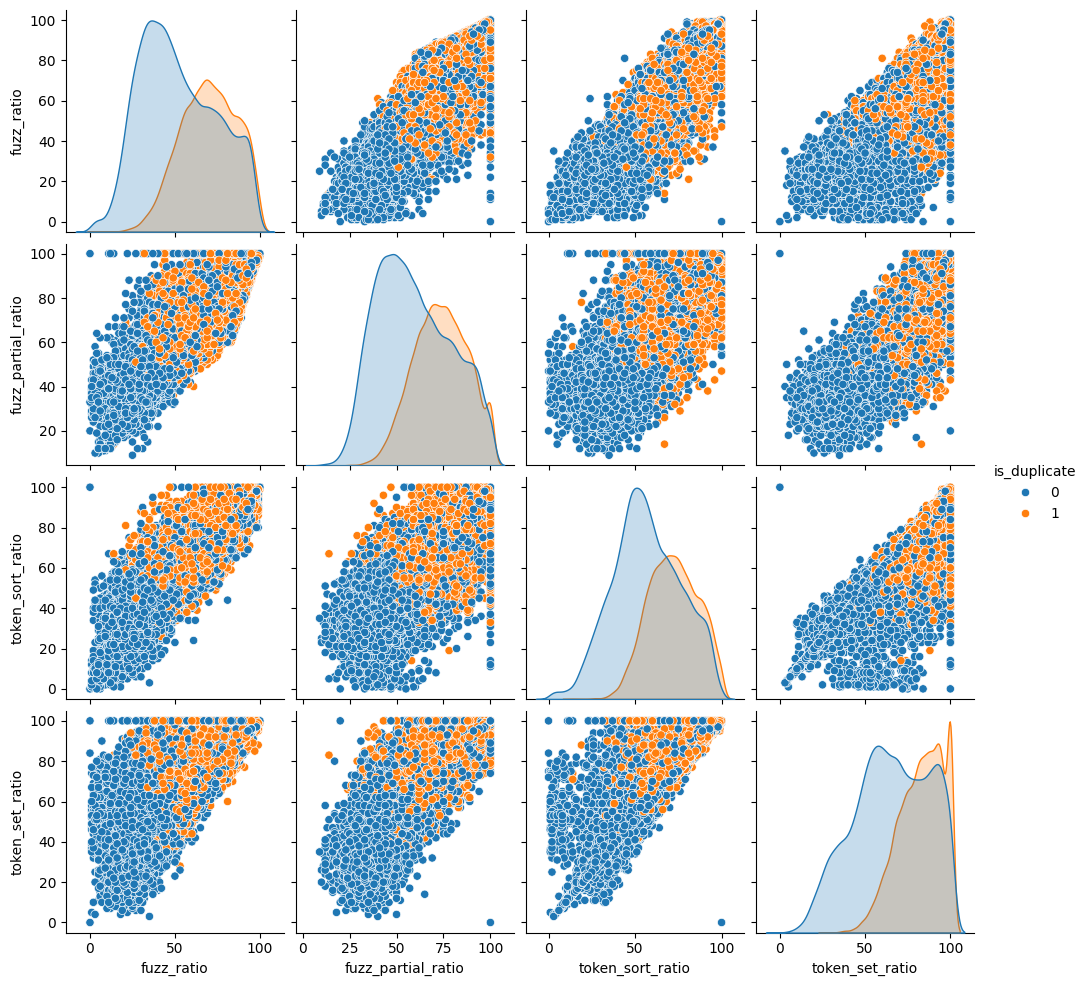

In [34]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [35]:
# using TSNE for Dimensionality reduction for 15 features(Generated after cleaning the data) to 3 dimension
from sklearn.preprocessing import MinMaxScaler
x=MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y=new_df['is_duplicate'].values

In [36]:
# from sklearn.manifold import TSNE

# tsne2d= TSNE(
#     n_components=2,
#     init='random',
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(x)

In [37]:
# x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s','o'])

In [38]:
# tsne3d = TSNE(
#     n_components=3,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(x)

In [39]:
# import plotly.graph_objs as go
# import plotly.offline as py  # No need to import deprecated tools module

# # Initialize notebook mode for offline plotting
# py.init_notebook_mode(connected=True)

# # Create 3D scatter plot
# trace1 = go.Scatter3d(
#     x=tsne3d[:, 0],
#     y=tsne3d[:, 1],
#     z=tsne3d[:, 2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color=y,
#         colorscale='Portland',
#         colorbar=dict(title='duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# # Define the layout for the plot
# layout = dict(
#     height=800,
#     width=800,
#     title='3D embedding with engineered features'
# )

# # Combine data and layout into a figure
# fig = dict(data=[trace1], layout=layout)

# # Plot the figure
# py.iplot(fig)  # No need for the filename argument unless plotting online

In [40]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry
289521,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...
4665,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...
54203,why did quora mark my question as incomplete,why does quora detect my question as an incomp...
132566,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs


In [41]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,1,57,41,11,8,6,19,0.32,0.799984,0.666656,...,0.545450,0.0,1.0,3.0,9.5,0.317073,39,46,67,85
289521,0,51,104,11,23,3,33,0.09,0.000000,0.000000,...,0.136363,0.0,0.0,11.0,16.5,0.117647,26,50,35,37
4665,0,123,122,42,42,18,38,0.47,0.923070,0.923070,...,0.708330,1.0,1.0,0.0,24.0,0.598361,100,99,100,99
54203,1,44,59,8,10,6,18,0.33,0.749981,0.599988,...,0.599994,0.0,1.0,2.0,9.0,0.363636,74,75,74,89
132566,0,53,39,11,9,6,20,0.30,0.749981,0.599988,...,0.545450,0.0,1.0,2.0,10.0,0.410256,76,85,78,84


In [42]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# import nltk

# # Download the tokenizer
# nltk.download('punkt')

# # Initialize the Porter stemmer
# stemmer = PorterStemmer()

# # Function to preprocess and stem text
# def stem_text(text):
#     tokens = word_tokenize(text)  # Tokenize text into words
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Stem each token
#     return ' '.join(stemmed_tokens)  # Join the stemmed tokens back into a single string

# # Apply stemming to both question1 and question2
# ques_df['question1_stemmed'] = ques_df['question1'].apply(stem_text)
# ques_df['question2_stemmed'] = ques_df['question2'].apply(stem_text)

# # Merge stemmed texts into a single list
# questions = list(ques_df['question1_stemmed']) + list(ques_df['question2_stemmed'])

# # Initialize CountVectorizer and vectorize the stemmed questions
# cv = CountVectorizer(max_features=3000)
# question_vectors = cv.fit_transform(questions).toarray()

# # Split the vectorized questions back into q1_arr and q2_arr
# q1_arr, q2_arr = np.vsplit(question_vectors, 2)

In [43]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download the tokenizer
nltk.download('punkt')

# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Function to preprocess and stem text
def stem_text(text):
    tokens = word_tokenize(text)  # Tokenize text into words
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Stem each token
    return stemmed_tokens  # Return the list of stemmed tokens

# Apply stemming and tokenization to both question1 and question2
ques_df['question1_stemmed'] = ques_df['question1'].apply(stem_text)
ques_df['question2_stemmed'] = ques_df['question2'].apply(stem_text)

# Merge stemmed token lists into a single list of sentences
questions = list(ques_df['question1_stemmed']) + list(ques_df['question2_stemmed'])

# Initialize and train Word2Vec model
w2v_model = Word2Vec(sentences=questions, vector_size=300, window=5, min_count=1, workers=4)

# Function to get the average word vectors for a given sentence
def get_avg_word2vec(tokens, model, vector_size):
    # Filter out words not in the model's vocabulary
    valid_words = [word for word in tokens if word in model.wv]
    if not valid_words:
        return np.zeros(vector_size)  # If no valid words, return a zero vector
    word_vecs = [model.wv[word] for word in valid_words]
    return np.mean(word_vecs, axis=0)

# Vectorize both question1 and question2 using the Word2Vec model
ques_df['q1_vec'] = ques_df['question1_stemmed'].apply(lambda x: get_avg_word2vec(x, w2v_model, 300))
ques_df['q2_vec'] = ques_df['question2_stemmed'].apply(lambda x: get_avg_word2vec(x, w2v_model, 300))

# Convert the lists of vectors into numpy arrays for further use
q1_arr = np.vstack(ques_df['q1_vec'].values)
q2_arr = np.vstack(ques_df['q2_vec'].values)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [44]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 600)

In [45]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(50000, 623)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,290,291,292,293,294,295,296,297,298,299
339499,1,57,41,11,8,6,19,0.32,0.799984,0.666656,...,-0.353742,0.201851,0.206289,0.091660,0.172545,0.428952,0.459202,0.460238,-0.057129,0.132181
289521,0,51,104,11,23,3,33,0.09,0.000000,0.000000,...,0.115936,0.267690,-0.150972,-0.038379,0.331431,0.462637,-0.041020,-0.068150,-0.169763,0.103663
4665,0,123,122,42,42,18,38,0.47,0.923070,0.923070,...,0.007724,0.345149,0.087587,0.080810,0.134472,0.190470,0.204458,-0.129955,0.044914,0.267056
54203,1,44,59,8,10,6,18,0.33,0.749981,0.599988,...,0.110502,-0.015732,-0.262749,0.134151,0.301090,0.502550,0.398845,0.299553,-0.134139,0.123031
132566,0,53,39,11,9,6,20,0.30,0.749981,0.599988,...,0.111127,0.258941,-0.153452,-0.033097,-0.038569,0.565907,0.264927,-0.024701,0.425418,-0.097327


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7894

In [48]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1=xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7956

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test,y_pred)

array([[5326,  940],
       [1166, 2568]])

In [51]:
confusion_matrix(y_test,y_pred1)

array([[5287,  979],
       [1065, 2669]])

In [52]:
# Increase data size , stemming , TFIDF instead of BAg of words

In [59]:

def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


def test_fetch_token_features(q1, q2):
    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0] * 8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    # Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


def test_fetch_length_features(q1, q2):
    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


def test_fetch_fuzzy_features(q1, q2):
    fuzzy_features = [0.0] * 4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


def preprocess(q):
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)


    contractions = {
        "ain't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q


def query_point_creator(q1, q2):
    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))

    # fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # Get the word embeddings for q1 and q2 using the Word2Vec model
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    # Calculate average word vector for q1 and q2
    q1_w2v = get_avg_word2vec(q1_tokens, w2v_model, 300)  # Assuming the Word2Vec model has vector size 300
    q2_w2v = get_avg_word2vec(q2_tokens, w2v_model, 300)

    return np.hstack((np.array(input_query).reshape(1, 22), q1_w2v.reshape(1, -1), q2_w2v.reshape(1, -1)))


In [60]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [68]:
xgb.predict(query_point_creator(q1,q2))

array([0])

In [62]:
w2v_model

In [63]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(w2v_model,open('tfidf.pkl','wb'))

In [64]:
pickle.dump(w2v_model,open('w2v_model.pkl','wb'))

In [69]:
pickle.dump(xgb,open('best_model.pkl','wb'))